In [1]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats

In [2]:
#pull data from the FDA API for hydrocodone adverse events reported in the 1st Quarter of 2023
url = "https://api.fda.gov/drug/event.json?search=receivedate:[20230101+TO+20230331]+AND+patient.drug.openfda.generic_name:hydrocodone&limit=1"

hydrocodone_data = []

for i in range(243):
    skip_url = url+"&skip="+str(i)
  
    try:  
        drug_events = requests.get(skip_url).json()
        results = drug_events["results"]
        date = results[0]["receivedate"]
        country = results[0]["primarysourcecountry"]
        sex = results[0]["patient"]["patientsex"]
        seriousness = results[0]["serious"]
        reaction = results[0]["patient"]["reaction"][0]["reactionmeddrapt"]
        company = results[0]["patient"]["drug"][0]["openfda"]["manufacturer_name"][0]


        hydrocodone_data.append({"date": date,
                            "country": country,
                            "sex": sex,
                            "seriousness": seriousness,
                            "reaction": reaction,
                            "company": company,
                            })
    
    except KeyError:
        print(f'{i} drug not found: Key Error')
        pass

hydrocodone_df = pd.DataFrame(hydrocodone_data)
hydrocodone_df

17 drug not found: Key Error
23 drug not found: Key Error
30 drug not found: Key Error
58 drug not found: Key Error
59 drug not found: Key Error
60 drug not found: Key Error
64 drug not found: Key Error
69 drug not found: Key Error
70 drug not found: Key Error
74 drug not found: Key Error
77 drug not found: Key Error
79 drug not found: Key Error
80 drug not found: Key Error
91 drug not found: Key Error
126 drug not found: Key Error
127 drug not found: Key Error
146 drug not found: Key Error
158 drug not found: Key Error
168 drug not found: Key Error
173 drug not found: Key Error
176 drug not found: Key Error
178 drug not found: Key Error
183 drug not found: Key Error
189 drug not found: Key Error
198 drug not found: Key Error
206 drug not found: Key Error
211 drug not found: Key Error
229 drug not found: Key Error
230 drug not found: Key Error
238 drug not found: Key Error
241 drug not found: Key Error
242 drug not found: Key Error


,date,country,sex,seriousness,reaction,company
0,20230102,US,2,2,Asthenia,AbbVie Inc.
1,20230102,US,2,1,Surgery,Immunex Corporation
2,20230102,US,1,2,Pruritus,AbbVie Inc.
3,20230103,US,2,1,Pulmonary oedema,"Clovis Oncology, Inc."
4,20230103,US,1,2,Infection,AbbVie Inc.
...,...,...,...,...,...,...
206,20230324,US,1,2,Rash,Celgene Corporation
207,20230322,US,2,1,Death,FOSUN PHARMA USA INC
208,20230324,US,2,2,Drug hypersensitivity,Dr. Reddy's Laboratories Limited
209,20230324,US,2,2,Product use in unapproved indication,sanofi-aventis U.S. LLC


In [3]:
#create a dataframe from the hydrocodone data pull and add the drug name column
hydrocodone_df["drug name"] = "hydrocodone"
hydrocodone_df

,date,country,sex,seriousness,reaction,company,drug name
0,20230102,US,2,2,Asthenia,AbbVie Inc.,hydrocodone
1,20230102,US,2,1,Surgery,Immunex Corporation,hydrocodone
2,20230102,US,1,2,Pruritus,AbbVie Inc.,hydrocodone
3,20230103,US,2,1,Pulmonary oedema,"Clovis Oncology, Inc.",hydrocodone
4,20230103,US,1,2,Infection,AbbVie Inc.,hydrocodone
...,...,...,...,...,...,...,...
206,20230324,US,1,2,Rash,Celgene Corporation,hydrocodone
207,20230322,US,2,1,Death,FOSUN PHARMA USA INC,hydrocodone
208,20230324,US,2,2,Drug hypersensitivity,Dr. Reddy's Laboratories Limited,hydrocodone
209,20230324,US,2,2,Product use in unapproved indication,sanofi-aventis U.S. LLC,hydrocodone


In [4]:
#pull data from the FDA API for oxycodone adverse events reported in the 1st Quarter of 2023
url = "https://api.fda.gov/drug/event.json?search=receivedate:[20230101+TO+20230331]+AND+patient.drug.openfda.generic_name:oxycodone&limit=1"

oxycodone_data = []

for i in range(250):
    skip_url = url+"&skip="+str(i)
    
    try:
        drug_events = requests.get(skip_url).json()
        results = drug_events["results"]

        date = results[0]["receivedate"]
        country = results[0]["primarysourcecountry"]
        sex = results[0]["patient"]["patientsex"]
        seriousness = results[0]["serious"]
        reaction = results[0]["patient"]["reaction"][0]["reactionmeddrapt"]
        company = results[0]["patient"]["drug"][0]["openfda"]["manufacturer_name"][0]


        oxycodone_data.append({"date": date,
                            "country": country,
                            "sex": sex,
                            "seriousness": seriousness,
                            "reaction": reaction,
                            "company": company
                            })
    except KeyError:
        print(f'{i} drug not found: Key Error')
        pass
        
oxycodone_df = pd.DataFrame(oxycodone_data)
oxycodone_df

11 drug not found: Key Error
31 drug not found: Key Error
36 drug not found: Key Error
37 drug not found: Key Error
38 drug not found: Key Error
40 drug not found: Key Error
55 drug not found: Key Error
59 drug not found: Key Error
60 drug not found: Key Error
65 drug not found: Key Error
72 drug not found: Key Error
73 drug not found: Key Error
108 drug not found: Key Error
127 drug not found: Key Error
130 drug not found: Key Error
131 drug not found: Key Error
135 drug not found: Key Error
139 drug not found: Key Error
141 drug not found: Key Error
143 drug not found: Key Error
160 drug not found: Key Error
166 drug not found: Key Error
168 drug not found: Key Error
172 drug not found: Key Error
173 drug not found: Key Error
181 drug not found: Key Error
195 drug not found: Key Error
200 drug not found: Key Error
204 drug not found: Key Error
208 drug not found: Key Error
209 drug not found: Key Error
210 drug not found: Key Error
211 drug not found: Key Error
227 drug not found: Ke

,date,country,sex,seriousness,reaction,company
0,20230101,US,2,1,Hernia,Pharmacyclics LLC
1,20230101,US,1,2,Impaired quality of life,sanofi-aventis U.S. LLC
2,20230101,US,1,2,Product dose omission issue,Amgen Inc
3,20230102,US,2,2,Hypersensitivity,Amgen Inc
4,20230102,US,1,1,Acute chest syndrome,Global Blood Therapeutics Inc.
...,...,...,...,...,...,...
209,20230111,US,2,1,Dizziness,"Collegium Pharmaceutical, Inc."
210,20230111,US,2,1,Neutropenia,Pfizer Laboratories Div Pfizer Inc
211,20230111,US,2,2,Dyspnoea,AbbVie Inc.
212,20230111,FR,1,1,Hepatic cytolysis,BluePoint Laboratories


In [5]:
#create a dataframe from the ocxycodone data pull and add the drug name column
oxycodone_df["drug name"]="oxycodone"
oxycodone_df

,date,country,sex,seriousness,reaction,company,drug name
0,20230101,US,2,1,Hernia,Pharmacyclics LLC,oxycodone
1,20230101,US,1,2,Impaired quality of life,sanofi-aventis U.S. LLC,oxycodone
2,20230101,US,1,2,Product dose omission issue,Amgen Inc,oxycodone
3,20230102,US,2,2,Hypersensitivity,Amgen Inc,oxycodone
4,20230102,US,1,1,Acute chest syndrome,Global Blood Therapeutics Inc.,oxycodone
...,...,...,...,...,...,...,...
209,20230111,US,2,1,Dizziness,"Collegium Pharmaceutical, Inc.",oxycodone
210,20230111,US,2,1,Neutropenia,Pfizer Laboratories Div Pfizer Inc,oxycodone
211,20230111,US,2,2,Dyspnoea,AbbVie Inc.,oxycodone
212,20230111,FR,1,1,Hepatic cytolysis,BluePoint Laboratories,oxycodone


In [6]:
#pull data from the FDA API for fentanyl adverse events reported in the 1st Quarter of 2023
url = "https://api.fda.gov/drug/event.json?search=receivedate:[20230101+TO+20230331]+AND+patient.drug.openfda.generic_name:fentanyl&limit=1"

fentanyl_data = []

for i in range(0,250,1):
    skip_url = url+"&skip="+str(i)
    
    try:
        drug_events = requests.get(skip_url).json()
        results = drug_events["results"]
        date = results[0]["receivedate"]
        country = results[0]["primarysourcecountry"]
        sex = results[0]["patient"]["patientsex"]
        seriousness = results[0]["serious"]
        reaction = results[0]["patient"]["reaction"][0]["reactionmeddrapt"]
        company = results[0]["patient"]["drug"][0]["openfda"]["manufacturer_name"][0]


        fentanyl_data.append({"date": date,
                            "country": country,
                            "sex": sex,
                            "seriousness": seriousness,
                            "reaction": reaction,
                            "company": company,
                            })
    except KeyError:
        print(f"{i} drug not found:Key Error")
        pass
    
fentanyl_df = pd.DataFrame(fentanyl_data)
fentanyl_df


10 drug not found:Key Error
18 drug not found:Key Error
24 drug not found:Key Error
31 drug not found:Key Error
32 drug not found:Key Error
33 drug not found:Key Error
35 drug not found:Key Error
36 drug not found:Key Error
39 drug not found:Key Error
42 drug not found:Key Error
45 drug not found:Key Error
46 drug not found:Key Error
49 drug not found:Key Error
50 drug not found:Key Error
51 drug not found:Key Error
55 drug not found:Key Error
59 drug not found:Key Error
60 drug not found:Key Error
62 drug not found:Key Error
63 drug not found:Key Error
64 drug not found:Key Error
70 drug not found:Key Error
74 drug not found:Key Error
77 drug not found:Key Error
80 drug not found:Key Error
81 drug not found:Key Error
82 drug not found:Key Error
83 drug not found:Key Error
90 drug not found:Key Error
94 drug not found:Key Error
95 drug not found:Key Error
106 drug not found:Key Error
107 drug not found:Key Error
114 drug not found:Key Error


,date,country,sex,seriousness,reaction,company
0,20230101,AT,1,1,Acute myeloid leukaemia,AbbVie Inc.
1,20230101,US,1,1,Drug ineffective for unapproved indication,Hikma Pharmaceuticals USA Inc.
2,20230101,US,2,2,Maternal exposure during pregnancy,Hikma Pharmaceuticals USA Inc.
3,20230102,US,2,2,Hypersensitivity,Amgen Inc
4,20230102,DE,2,1,Groin pain,"Regeneron Pharmaceuticals, Inc."
...,...,...,...,...,...,...
211,20230113,BE,2,1,Cardiac arrest,ALVOGEN
212,20230113,US,1,1,Drug abuse,ALVOGEN
213,20230113,US,2,1,Drug abuse,ALVOGEN
214,20230113,US,1,1,Drug abuse,ALVOGEN


In [7]:
#create a dataframe from the fentanyl data pull and add the drug name column
fentanyl_df["drug name"] = "fentanyl"
fentanyl_df

,date,country,sex,seriousness,reaction,company,drug name
0,20230101,AT,1,1,Acute myeloid leukaemia,AbbVie Inc.,fentanyl
1,20230101,US,1,1,Drug ineffective for unapproved indication,Hikma Pharmaceuticals USA Inc.,fentanyl
2,20230101,US,2,2,Maternal exposure during pregnancy,Hikma Pharmaceuticals USA Inc.,fentanyl
3,20230102,US,2,2,Hypersensitivity,Amgen Inc,fentanyl
4,20230102,DE,2,1,Groin pain,"Regeneron Pharmaceuticals, Inc.",fentanyl
...,...,...,...,...,...,...,...
211,20230113,BE,2,1,Cardiac arrest,ALVOGEN,fentanyl
212,20230113,US,1,1,Drug abuse,ALVOGEN,fentanyl
213,20230113,US,2,1,Drug abuse,ALVOGEN,fentanyl
214,20230113,US,1,1,Drug abuse,ALVOGEN,fentanyl


In [8]:
#put all three dataframes together for a main dataframe
df = pd.concat([hydrocodone_df, oxycodone_df, fentanyl_df], axis=0)
df

,date,country,sex,seriousness,reaction,company,drug name
0,20230102,US,2,2,Asthenia,AbbVie Inc.,hydrocodone
1,20230102,US,2,1,Surgery,Immunex Corporation,hydrocodone
2,20230102,US,1,2,Pruritus,AbbVie Inc.,hydrocodone
3,20230103,US,2,1,Pulmonary oedema,"Clovis Oncology, Inc.",hydrocodone
4,20230103,US,1,2,Infection,AbbVie Inc.,hydrocodone
...,...,...,...,...,...,...,...
211,20230113,BE,2,1,Cardiac arrest,ALVOGEN,fentanyl
212,20230113,US,1,1,Drug abuse,ALVOGEN,fentanyl
213,20230113,US,2,1,Drug abuse,ALVOGEN,fentanyl
214,20230113,US,1,1,Drug abuse,ALVOGEN,fentanyl


In [9]:
#pull the number of adverse reactions
reaction = df["reaction"].value_counts()
reaction

Drug abuse                           129
Death                                 30
Completed suicide                     25
Plasma cell myeloma                   12
Drug ineffective                      11
                                    ... 
Peripheral artery thrombosis           1
White blood cell count increased       1
Drug withdrawal syndrome neonatal      1
Hysterectomy                           1
Anger                                  1
Name: reaction, Length: 255, dtype: int64

In [10]:
#turn that into a dataframe
reaction_df = pd.DataFrame(reaction)
reaction_df

,reaction
Drug abuse,129
Death,30
Completed suicide,25
Plasma cell myeloma,12
Drug ineffective,11
...,...
Peripheral artery thrombosis,1
White blood cell count increased,1
Drug withdrawal syndrome neonatal,1
Hysterectomy,1


In [11]:
#add an index and rename the columns
reaction_df = reaction_df.reset_index()
reaction_df.rename(columns={"reaction":"reaction_counts"}, inplace = True)
reaction_df.rename(columns={"index":"reaction"}, inplace = True)
reaction_df

,reaction,reaction_counts
0,Drug abuse,129
1,Death,30
2,Completed suicide,25
3,Plasma cell myeloma,12
4,Drug ineffective,11
...,...,...
250,Peripheral artery thrombosis,1
251,White blood cell count increased,1
252,Drug withdrawal syndrome neonatal,1
253,Hysterectomy,1


In [12]:
#filter the data to show the number of adverse events greater than 2
reaction2_df = reaction_df.loc[reaction_df["reaction_counts"]>2]
reaction2_df

,reaction,reaction_counts
0,Drug abuse,129
1,Death,30
2,Completed suicide,25
3,Plasma cell myeloma,12
4,Drug ineffective,11
5,Surgery,9
6,Toxicity to various agents,8
7,Suspected suicide,6
8,Pruritus,6
9,Malaise,6


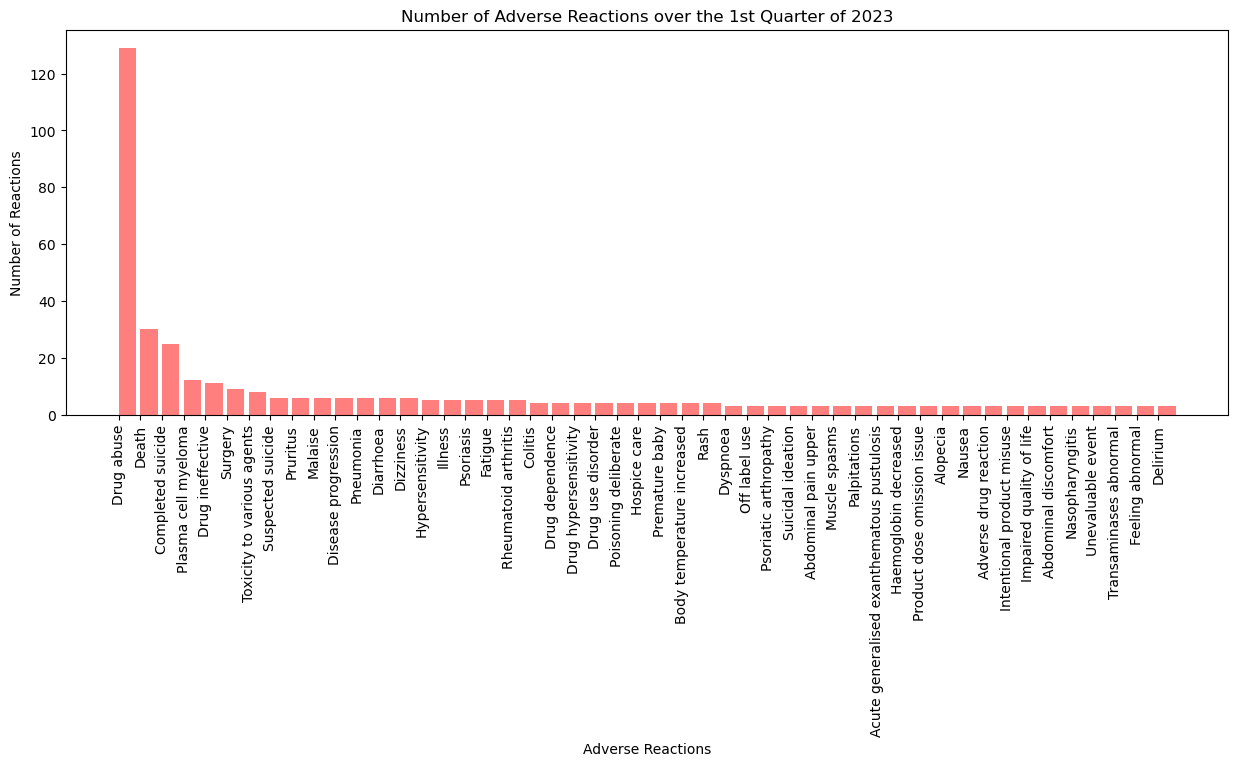

In [13]:
#create a bar chart that shows how many adverse events(more than 2) were reported
x_axis = np.arange(len(reaction2_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(15,5))
plt.bar(x_axis, reaction2_df["reaction_counts"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, reaction2_df["reaction"], rotation = 90, )
plt.title("Number of Adverse Reactions over the 1st Quarter of 2023")
plt.xlabel("Adverse Reactions")
plt.ylabel("Number of Reactions")

plt.show()

In [14]:
# Top 7 Reactions Identified in Adverse Events Q1 2023
# Selecting rows based on condition for Hydrocodone
reactions = ["Drug abuse", "Death", "Completed suicide", "Plasma cell myeloma", "Drug ineffective", "Surgery", "Toxicity to various agents"]
hydroreact_df = hydrocodone_df[hydrocodone_df["reaction"].isin(reactions)]
# hydroreact_df

# Filter the DataFrame down only to those columns to chart and rename columns
hydroreact_df = hydroreact_df[["reaction","drug name"]]

# Count the number of reactions
hydroreactcount = hydroreact_df.groupby("reaction").count()

# Renaming headers in df
hydroreactcount.rename(columns={"drug name": "Hydrocodone"}, inplace = True)

hydroreactcount

,Hydrocodone
reaction,
Completed suicide,24
Death,18
Drug abuse,3
Drug ineffective,4
Surgery,4


In [15]:
# Top 7 Reactions Identified in Adverse Events Q1 2023
# Selecting rows based on conditions for Oxycodone
reactions = ["Drug abuse", "Death", "Completed suicide", "Plasma cell myeloma", "Drug ineffective", "Surgery", "Toxicity to various agents"]
oxyreact_df = oxycodone_df[oxycodone_df["reaction"].isin(reactions)]
# oxyreact_df

# Filter the DataFrame down only to those columns to chart and rename columns
oxyreact_df = oxyreact_df[["reaction","drug name"]]

# Count the number of reactions
oxyreactcount = oxyreact_df.groupby("reaction").count()

# Renaming headers in df
oxyreactcount.rename(columns={"drug name": "Oxycodone"}, inplace = True)

oxyreactcount

,Oxycodone
reaction,
Completed suicide,1
Death,9
Drug abuse,2
Drug ineffective,4
Plasma cell myeloma,12
Surgery,5
Toxicity to various agents,1


In [16]:
# Top 7 Reactions Identified in Adverse Events Q1 2023
# Selecting rows based on conditions of Fentanyl
reactions = ["Drug abuse", "Death", "Completed suicide", "Plasma cell myeloma", "Drug ineffective", "Surgery", "Toxicity to various agents"]
fentyreact_df = fentanyl_df[fentanyl_df["reaction"].isin(reactions)]
# fentyreact_df

# Filter the DataFrame down only to those columns to chart and rename columns
fentyreact_df = fentyreact_df[["reaction","drug name"]]

# Count the number of reactions
fentyreactcount = fentyreact_df.groupby("reaction").count()

# Renaming headers in df
fentyreactcount.rename(columns={"drug name": "Fentanyl"}, inplace = True)

fentyreactcount

,Fentanyl
reaction,
Death,3
Drug abuse,124
Drug ineffective,3
Toxicity to various agents,7


In [17]:
# Merging Top 7 dataframes
drugreactct_df = oxyreactcount.join(hydroreactcount, how='left')
drugreactct_df = drugreactct_df.join(fentyreactcount,how='left')

# Apply the function to delete NaN
drugreactct_df = drugreactct_df.fillna(0)

drugreactct_df = drugreactct_df.reset_index()

drugreactct_df

,reaction,Oxycodone,Hydrocodone,Fentanyl
0,Completed suicide,1,24.0,0.0
1,Death,9,18.0,3.0
2,Drug abuse,2,3.0,124.0
3,Drug ineffective,4,4.0,3.0
4,Plasma cell myeloma,12,0.0,0.0
5,Surgery,5,4.0,0.0
6,Toxicity to various agents,1,0.0,7.0


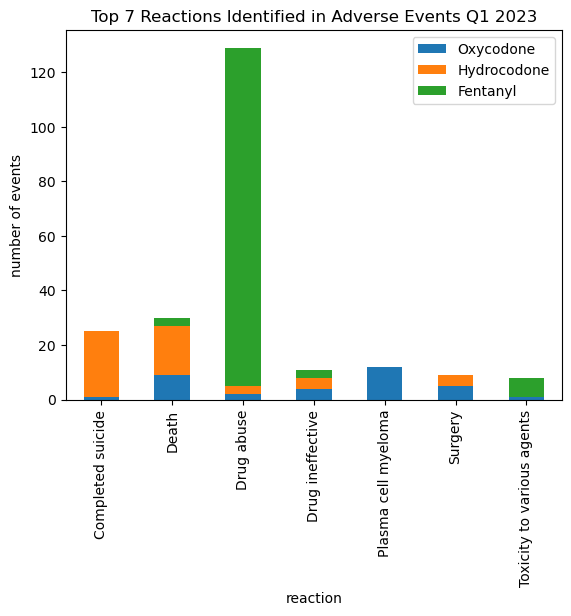

In [18]:
# plot the Top 7 Adverse Events
drugreactct_df.plot.bar(x='reaction', stacked=True, title='Top 7 Reactions Identified in Adverse Events Q1 2023')
plt.ylabel("number of events")
plt.show()

In [19]:
# Creating df for scatter plot for # adverse events over time

# Filter the DataFrame down only to those columns to chart and rename columns
hydrotime_df = hydrocodone_df[["date","drug name"]]
oxytime_df = oxycodone_df[["date","drug name"]]
fentytime_df = fentanyl_df[["date","drug name"]]

# Count the number of reactions
hydrotimect_df = hydrotime_df.groupby("date").count()
oxytimect_df = oxytime_df.groupby("date").count()
fentytimect_df = hydrotime_df.groupby("date").count()

# Renaming headers in df
hydrotimect_df.rename(columns={"drug name": "Hydrocodone"}, inplace = True)
oxytimect_df.rename(columns={"drug name": "Oxycodone"}, inplace = True)
fentytimect_df.rename(columns={"drug name": "Fentanyl"}, inplace = True)

# Reindex
hydrotimect_df = hydrotimect_df.reset_index()
oxytimect_df = oxytimect_df.reset_index()
fentytimect_df = fentytimect_df.reset_index()

# hydrotimect_df
# oxytimect_df
# fentytimect_df

timerge_df = pd.merge(hydrotimect_df, oxytimect_df, on = ['date'], how = 'outer')
timerge_df = pd.merge(timerge_df, fentytimect_df, on = ['date'], how = 'outer')

# Apply the function to delete NaN
timerge_df = timerge_df.fillna(0)

timerge_df

,date,Hydrocodone,Oxycodone,Fentanyl
0,20230102,3.0,22.0,3.0
1,20230103,3.0,30.0,3.0
2,20230104,2.0,31.0,2.0
3,20230105,3.0,30.0,3.0
4,20230106,6.0,23.0,6.0
5,20230109,1.0,21.0,1.0
6,20230110,5.0,20.0,5.0
7,20230111,1.0,30.0,1.0
8,20230112,4.0,0.0,4.0
9,20230113,2.0,0.0,2.0


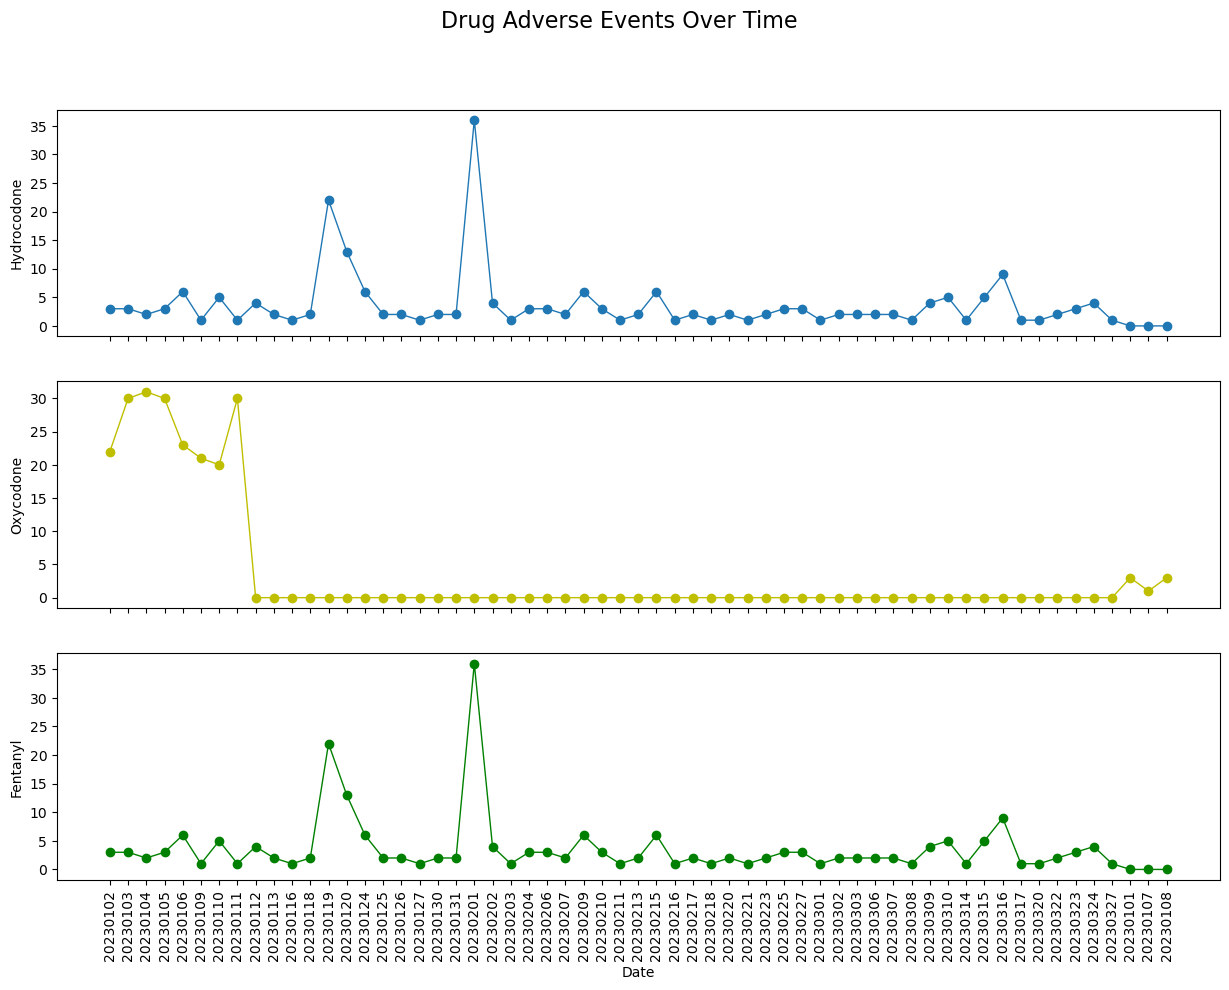

In [20]:
# create a subplot to show all 3 drug adverse events over time
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(15,10))
fig.suptitle("Drug Adverse Events Over Time", fontsize=16)

#Hydrocodone
ax1.plot(timerge_df["date"], timerge_df["Hydrocodone"], linewidth=1, marker="o")
ax1.set_ylabel("Hydrocodone")

#Oxycodone
ax2.plot(timerge_df["date"], timerge_df["Oxycodone"], linewidth=1, marker="o", color="y")
ax2.set_ylabel("Oxycodone")

#Fentanyl
ax3.plot(timerge_df["date"], timerge_df["Fentanyl"], linewidth=1, marker="o", color="g")
ax3.set_ylabel("Fentanyl")
ax3.set_xlabel("Date")
plt.xticks(rotation = 90)

plt.show()

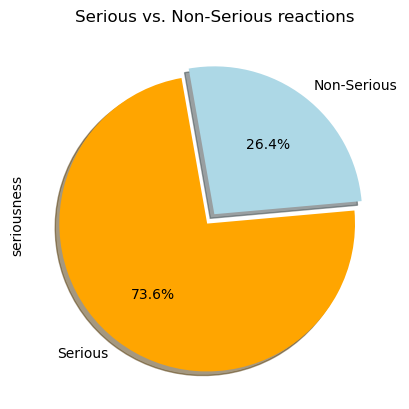

In [21]:
#evaluate the seriousness of the adverse events
#create a pie chart that shows the percent of serious vs. non-serious adverse events
serious_pie = df["seriousness"].value_counts()
serious_pie

labels = ["Serious","Non-Serious"]
colors = ["orange", "lightblue"]

serious_pie.plot(kind="pie", y = serious_pie, labels = labels, colors = colors, autopct = "%1.1f%%", title ="Serious vs. Non-Serious reactions", explode = (.08,0), shadow = True, startangle = 100)
plt.show()

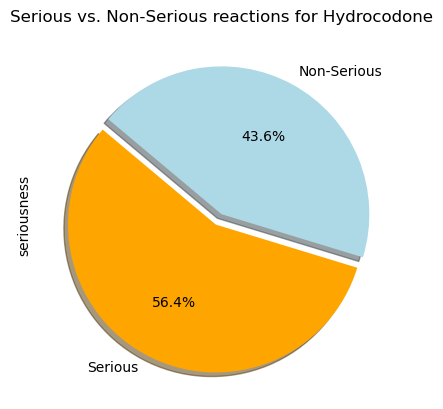

In [22]:
#create a pie chart that shows the percent of serious vs. non-serious adverse events for Hydrocodone 
hydrocodone_pie = hydrocodone_df["seriousness"].value_counts()
hydrocodone_pie

labels = ["Serious","Non-Serious"]
colors = ["orange", "lightblue"]

hydrocodone_pie.plot(kind="pie", y = hydrocodone_pie, labels = labels, colors=colors, autopct = "%1.1f%%", title ="Serious vs. Non-Serious reactions for Hydrocodone", explode = (.08,0), shadow = True, startangle = 140)
plt.show()

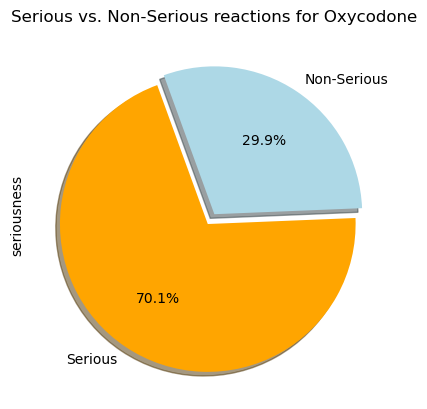

In [23]:
#create a pie chart that shows the percent of serious vs. non-serious adverse events for Oxycodone
oxycodone_pie = oxycodone_df["seriousness"].value_counts()
oxycodone_pie

labels = ["Serious","Non-Serious"]
colors = ["orange", "lightblue"]

oxycodone_pie.plot(kind="pie", y = oxycodone_pie, labels = labels, colors=colors, autopct = "%1.1f%%", title ="Serious vs. Non-Serious reactions for Oxycodone", explode = (.08,0), shadow = True, startangle = 110)
plt.show()

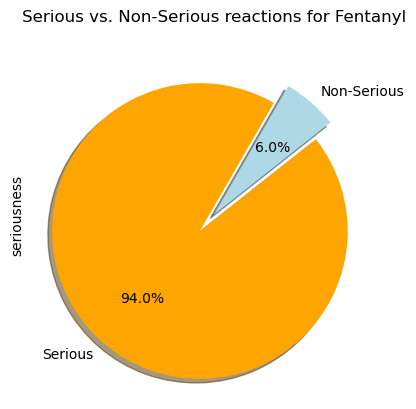

In [24]:
#create a pie chart that shows the percent of serious vs. non-serious adverse events for Fentanyl
fentanyl_pie = fentanyl_df["seriousness"].value_counts()
fentanyl_pie

labels = ["Serious","Non-Serious"]
colors = ["orange", "lightblue"]

fentanyl_pie.plot(kind="pie", y = fentanyl_pie, labels = labels, colors = colors, autopct = "%1.1f%%", title ="Serious vs. Non-Serious reactions for Fentanyl", explode = (.15,0), shadow = True, startangle = 60)
plt.show()

In [25]:
#CHI-square analysis on number of serious adverse events per drug
observed = pd.Series([119,150,203], index = ["Hydrocodone", "Oxycodone", "Fentanyl"])
CHI_df = pd.DataFrame([observed]).T
CHI_df[1] = (472/3)
CHI_df.columns = ["observed", "expected"]
CHI_df

,observed,expected
Hydrocodone,119,157.333333
Oxycodone,150,157.333333
Fentanyl,203,157.333333


In [26]:
#calculating the critical value
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
critical_value

5.991464547107979

In [27]:
#calculating the CHI-Square
stats.chisquare(CHI_df['observed'], CHI_df['expected'])

Power_divergenceResult(statistic=22.9364406779661, pvalue=1.0457194589480918e-05)

## Conclusion
Since the chi square value of 22.93 exceeds the critical value of 5.99, we conclude that the results are statistically significant. Since the p-value is less than .05, we can also determine there is a  statistically significant difference for each drug.

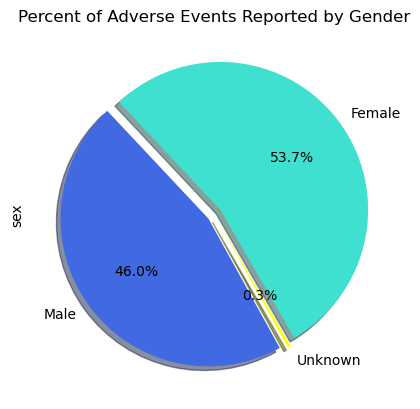

In [28]:
#evaluate adverse events by sex
#create a pie chart that shows how many Male vs. Female patients experienced adverse events
gender_pie = df["sex"].value_counts()
gender_pie

labels = ["Female","Male", "Unknown"]
colors = ["turquoise", "royalblue", "yellow"]

gender_pie.plot(kind="pie", y = gender_pie, labels = labels, colors=colors, autopct = "%1.1f%%", title ="Percent of Adverse Events Reported by Gender", explode = (.05,.05,.03), shadow = True, startangle = 300)
plt.show()

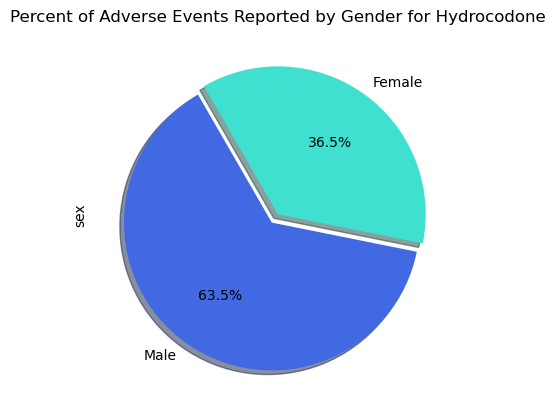

In [29]:
#create a pie chart that shows how many Male vs. Female patients experienced adverse events for Hydrocodone
gender_hydrocodone = hydrocodone_df["sex"].value_counts()
gender_hydrocodone

labels = ["Male","Female"]
colors = ["royalblue", "turquoise"]

gender_hydrocodone.plot(kind="pie", y = gender_hydrocodone, labels = labels, autopct = "%1.1f%%", title ="Percent of Adverse Events Reported by Gender for Hydrocodone", colors=colors, explode = (.07,0), shadow = True, startangle = 120)
plt.show()

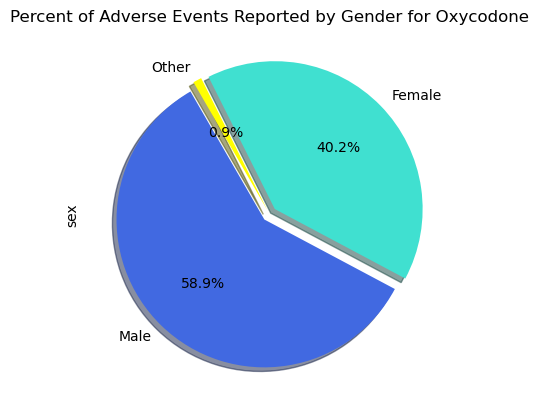

In [30]:
#create a pie chart that shows how many Male vs. Female patients experienced adverse events for Oxycodone
gender_oxycodone = oxycodone_df["sex"].value_counts()
gender_oxycodone

labels = ["Male","Female", "Other"]
colors = ["royalblue", "turquoise", "yellow"]

gender_oxycodone.plot(kind="pie", y = gender_oxycodone,labels = labels, autopct = "%1.1f%%", title ="Percent of Adverse Events Reported by Gender for Oxycodone", colors = colors, explode =(.05,.05,.03), shadow = True, startangle = 120)
plt.show()

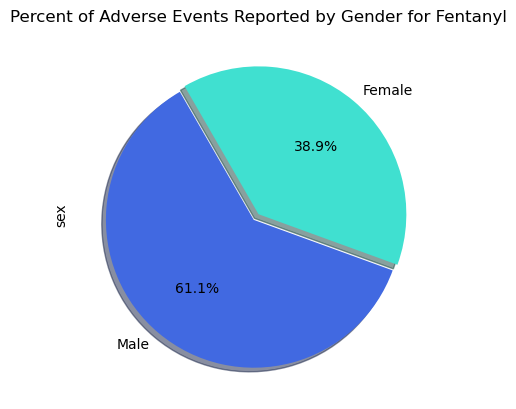

In [31]:
#create a pie chart that shows how many Male vs. Female patients experienced adverse events for Fentanyl
gender_fentanyl = fentanyl_df["sex"].value_counts()
gender_fentanyl

labels = ["Male","Female"]
colors = ["royalblue","turquoise"]

gender_fentanyl.plot(kind="pie", y = gender_fentanyl, labels = labels, colors = colors, autopct = "%1.1f%%", title ="Percent of Adverse Events Reported by Gender for Fentanyl", explode = (.05, 0), shadow = True, startangle = 120)
plt.show()

In [32]:
#Pull the number of reactions per adverse events reported
company_number = df["reaction"].value_counts()
company_number.reset_index()
company_number

Drug abuse                           129
Death                                 30
Completed suicide                     25
Plasma cell myeloma                   12
Drug ineffective                      11
                                    ... 
Peripheral artery thrombosis           1
White blood cell count increased       1
Drug withdrawal syndrome neonatal      1
Hysterectomy                           1
Anger                                  1
Name: reaction, Length: 255, dtype: int64

In [33]:
#convert date from string format to integer
df['report date'] = [(int(x) - 20230000) for x in df['date']]

# Selecting rows based on condition
reactions=['Drug abuse']
time_df =df[df["reaction"].isin(reactions)]

# Filter the DataFrame down only to those columns to chart and rename columns
time_df = time_df[["report date","reaction"]]

# Count the number of reactions
time_groupdf = time_df.groupby("report date").count()

time_groupdf = time_groupdf.reset_index()
time_groupdf

,report date,reaction
0,103,1
1,104,1
2,105,1
3,112,1
4,113,122
5,120,2
6,310,1


In [34]:
time_df

,report date,reaction
60,120,Drug abuse
67,120,Drug abuse
180,310,Drug abuse
68,104,Drug abuse
103,105,Drug abuse
...,...,...
210,113,Drug abuse
212,113,Drug abuse
213,113,Drug abuse
214,113,Drug abuse


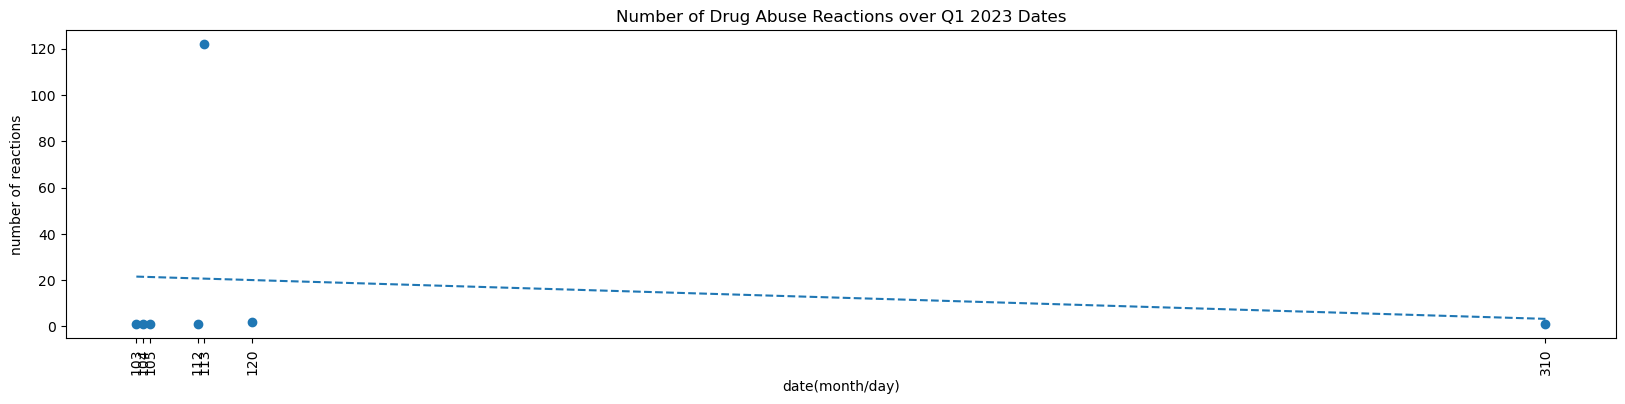

In [35]:
#create a scatter plot to show the number of adverse events reported over time
x_axis = time_groupdf['report date']
y_axis = time_groupdf['reaction']

#plot a regression line to the data
d_slope, d_int, d_r, d_p, d_std_err = stats.linregress(x_axis, y_axis)
d_fit = d_slope * x_axis + d_int

# plot the data
plt.figure(figsize=(20,4))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,d_fit,"--")
plt.xticks(x_axis, rotation = 90)
plt.title("Number of Drug Abuse Reactions over Q1 2023 Dates")
plt.xlabel("date(month/day)")
plt.ylabel("number of reactions")

plt.show()